
# Sustainable Development Data Analysis for Fashion Industry

Focusing on the fashion industry to uncover key factors contributing to sustainability and predict brand success using advanced machine learning models.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load the dataset
data = pd.read_csv(r"C:\Users\data_\Downloads\archive (1)\sustainable_development_report_2023.csv")

# Let's take a sneak peek at our data
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
  country_code  country region  overall_score  goal_1_score  goal_2_score  \
0          FIN  Finland   OECD      86.760595       99.5750     60.886750   
1          SWE   Sweden   OECD      85.981397       98.8885     63.074125   
2          DNK  Denmark   OECD      85.683637       99.2155     71.025250   
3          DEU  Germany   OECD      83.358447       99.5105     72.366000   
4          AUT  Austria   OECD      82.280189       99.4510     73.067500   

   goal_3_score  goal_4_score  goal_5_score  goal_6_score  ...  goal_8_score  \
0     95.386385     97.169333      92.11125       94.3276  ...     86.789000   
1     96.904000     99.761667      91.44025       95.0576  ...     84.966429   
2     95.398500     99.339667      86.99800       90.7316  ...     87.562429   
3     93.039357     97.162667      81.92025       88.4434  ...     86.967286   
4     92.468000     97.914333      84.57925       92.1636  ...     83.274143   

   goal_9_score  goal_10_

In [2]:

# Dropping rows with missing values to ensure data quality
data = data.dropna()


In [3]:

# Encoding categorical variables to numeric format for our models
label_encoder = LabelEncoder()
data['country'] = label_encoder.fit_transform(data['country'])


In [4]:

# Standardizing numerical variables for better model performance
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [5]:

# Creating a new feature by combining existing scores
data['goal_1_2_interaction'] = data['goal_1_score'] * data['goal_2_score']


In [6]:

# Defining our target variable
data['success_metric'] = data['overall_score']


In [7]:

# Excluding non-numeric columns for our model inputs
X = data.drop(['success_metric', 'country_code', 'country', 'region'], axis=1)
y = data['success_metric']


In [8]:

# Splitting the data into training and testing sets to evaluate model performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Summary statistics to get an overview of the data
print("Summary statistics of the dataset:")
print(data.describe())

Summary statistics of the dataset:
          country  overall_score  goal_1_score  goal_2_score  goal_3_score  \
count  107.000000   1.070000e+02  1.070000e+02  1.070000e+02  1.070000e+02   
mean     0.000000  -6.225550e-17  6.640586e-17 -2.199694e-16 -4.233374e-16   
std      1.004706   1.004706e+00  1.004706e+00  1.004706e+00  1.004706e+00   
min     -1.715938  -2.150504e+00 -2.775863e+00 -3.625939e+00 -2.656392e+00   
25%     -0.857969  -6.736440e-01 -5.923837e-01 -5.657527e-01 -9.378019e-01   
50%      0.000000   1.769443e-01  5.417467e-01  9.526717e-02  3.215570e-01   
75%      0.857969   7.616384e-01  7.258879e-01  7.092050e-01  8.164513e-01   
max      1.715938   1.787930e+00  7.624786e-01  2.217281e+00  1.290927e+00   

       goal_4_score  goal_5_score  goal_6_score  goal_7_score  goal_8_score  \
count  1.070000e+02  1.070000e+02  1.070000e+02  1.070000e+02  1.070000e+02   
mean   5.561491e-16 -5.436980e-16 -3.735330e-16  3.942848e-17 -2.843001e-16   
std    1.004706e+00  1.00

C:\Users\data_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


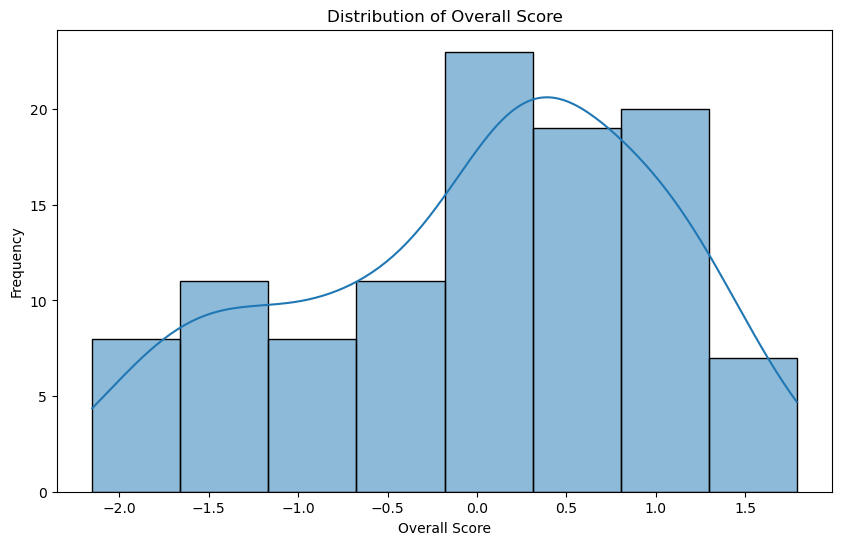

In [10]:

# Visualizing the distribution of the overall sustainability score
plt.figure(figsize=(10, 6))
sns.histplot(data['overall_score'], kde=True)
plt.title('Distribution of Overall Score')
plt.xlabel('Overall Score')
plt.ylabel('Frequency')
plt.show()

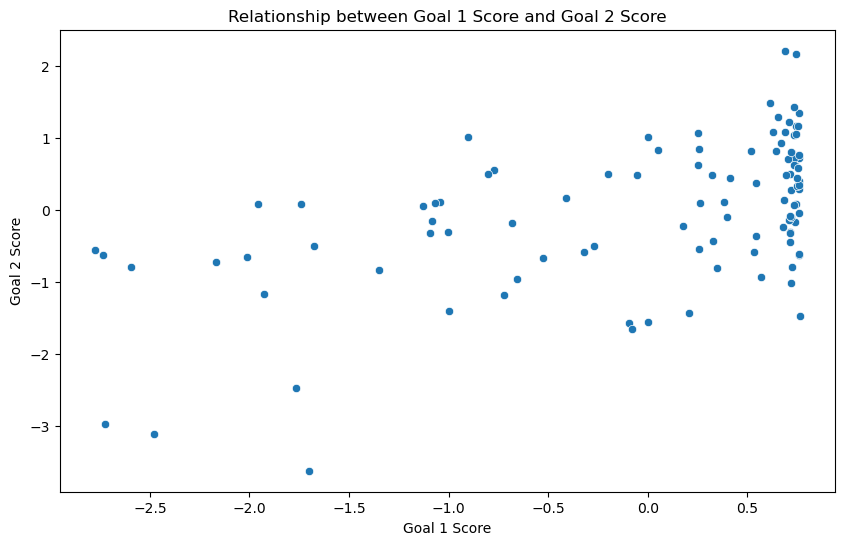

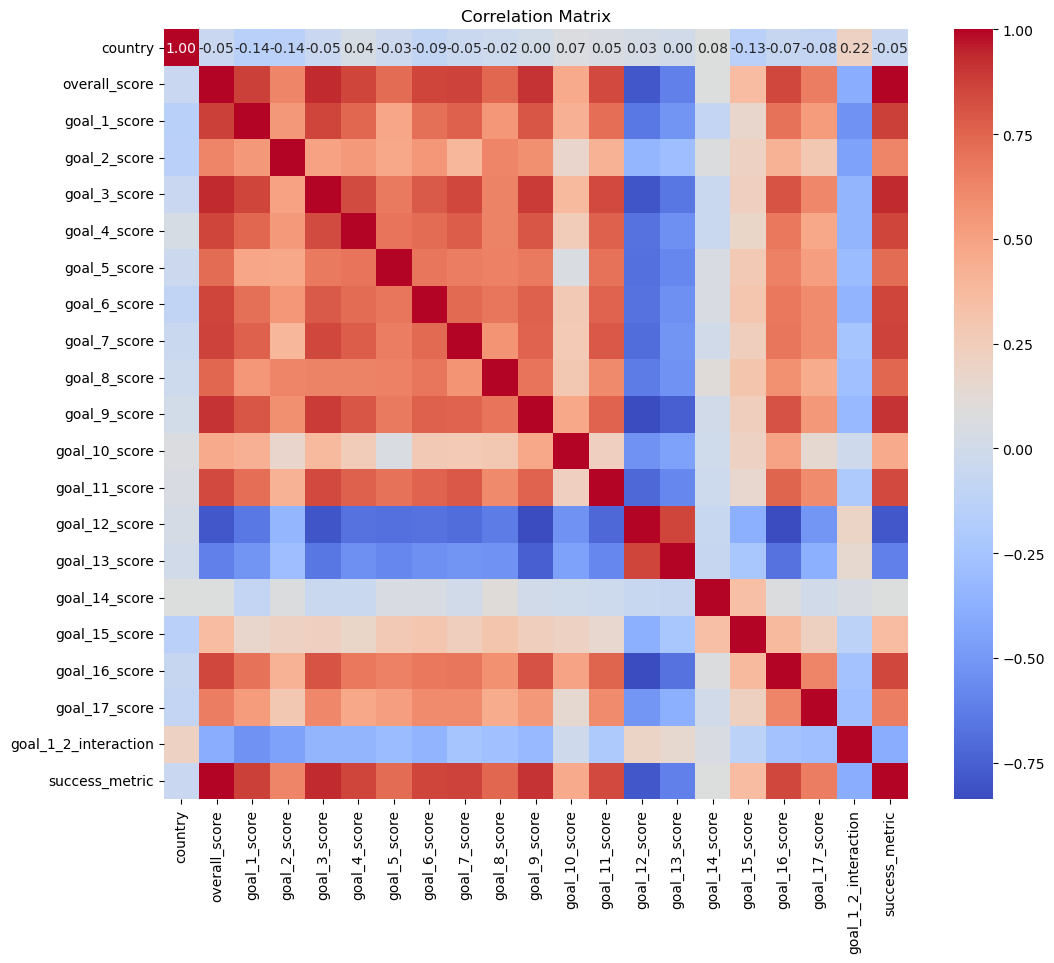

In [11]:


# Exploring the relationship between Goal 1 Score and Goal 2 Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='goal_1_score', y='goal_2_score', data=data)
plt.title('Relationship between Goal 1 Score and Goal 2 Score')
plt.xlabel('Goal 1 Score')
plt.ylabel('Goal 2 Score')
plt.show()

# Visualizing the correlation matrix to understand feature relationships
plt.figure(figsize=(12, 10))
numeric_data = data.select_dtypes(include=[np.number])  # Ensure only numeric data
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


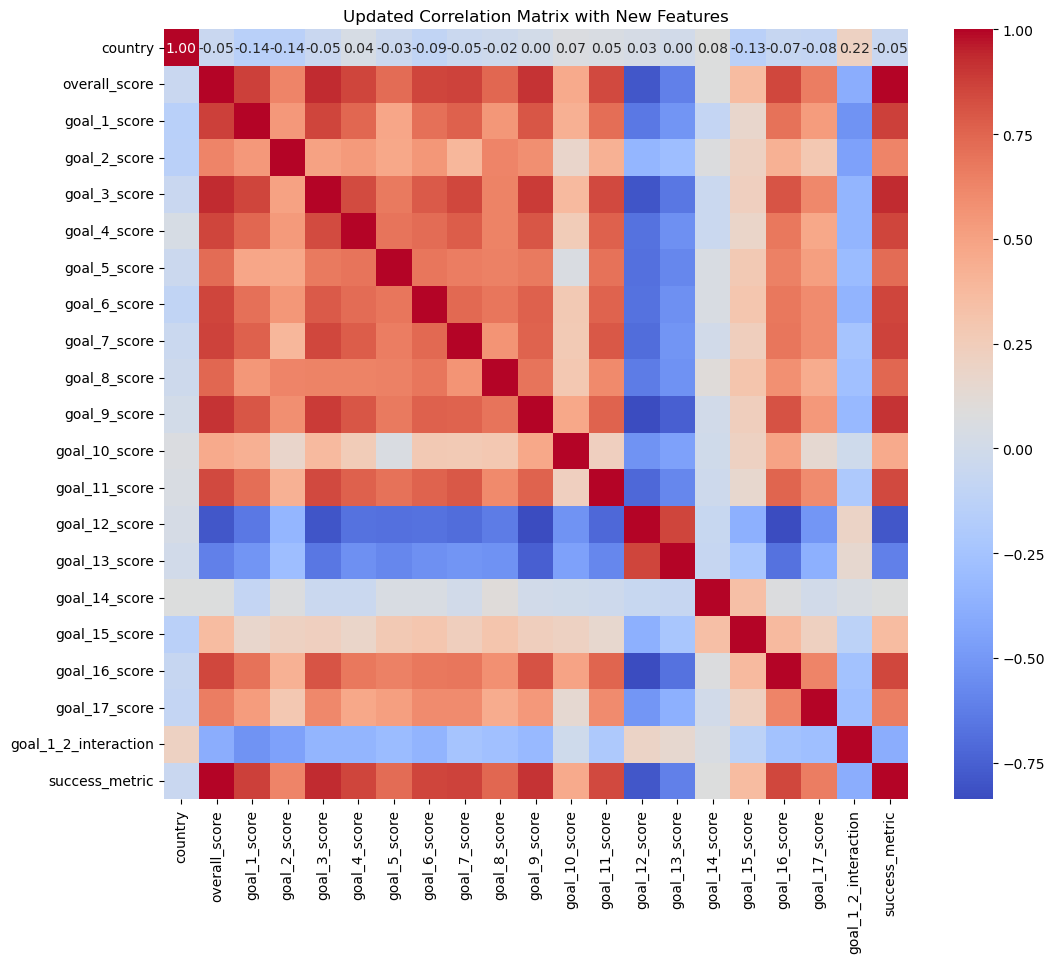

In [12]:

# Creating new features and selecting the most relevant ones based on correlation
data['goal_1_2_interaction'] = data['goal_1_score'] * data['goal_2_score']

# Display the updated correlation matrix with new features
plt.figure(figsize=(12, 10))
numeric_data = data.select_dtypes(include=[np.number]) 
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Updated Correlation Matrix with New Features')
plt.show()


In [13]:

# Linear Regression
# linear approach to modeling the relationship between a dependent variable and one or more independent variables:



lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
print(f"Linear Regression - MSE: {lr_mse}, R2 Score: {lr_r2}")

# Decision Tree Regressor
# tree-like model of decisions to predict the value of a target variable:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
print(f"Decision Tree - MSE: {dt_mse}, R2 Score: {dt_r2}")

# Random Forest Regressor
#method that uses multiple decision trees to improve the accuracy and robustness of predictions:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest - MSE: {rf_mse}, R2 Score: {rf_r2}")

# Gradient Boosting Regressor
#ensemble technique that builds models sequentially, with each new model correcting the errors of the previous ones
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)
print(f"Gradient Boosting - MSE: {gb_mse}, R2 Score: {gb_r2}")


Linear Regression - MSE: 1.900104974678407e-31, R2 Score: 1.0
Decision Tree - MSE: 0.019556206130538864, R2 Score: 0.9803107456850557
Random Forest - MSE: 0.008847450608978097, R2 Score: 0.9910923568755471
Gradient Boosting - MSE: 0.001987237631451138, R2 Score: 0.9979992424477073


Model Performance Comparison:
               Model           MSE  R2 Score
0  Linear Regression  1.900105e-31  1.000000
1      Decision Tree  1.955621e-02  0.980311
2      Random Forest  8.847451e-03  0.991092
3  Gradient Boosting  1.987238e-03  0.997999


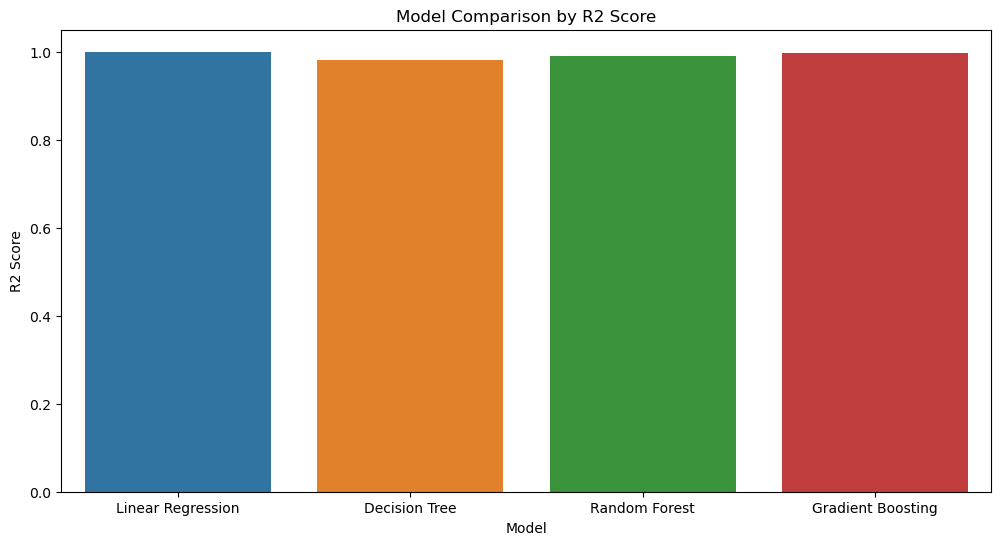

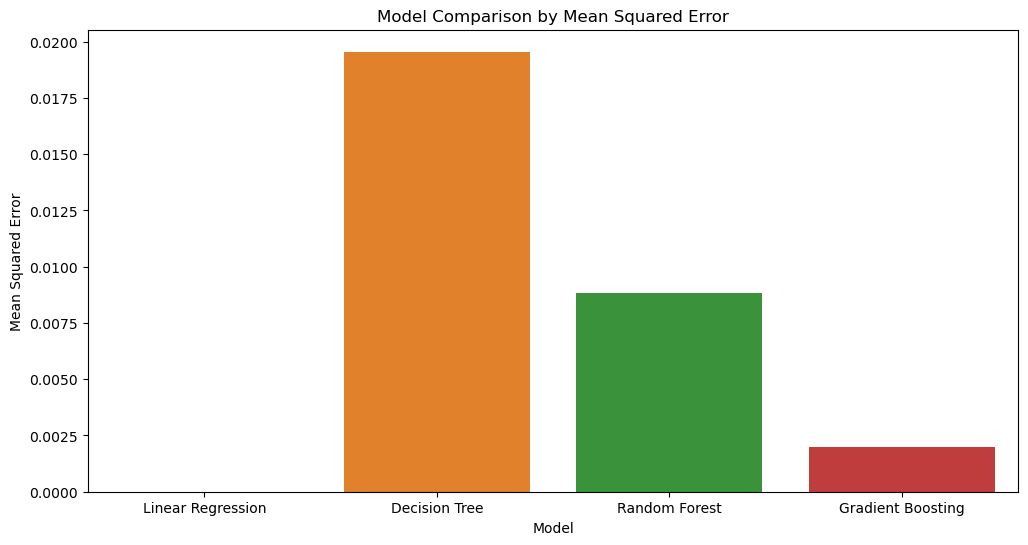

In [14]:

# Comparing the performance of different models
model_performance = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'MSE': [lr_mse, dt_mse, rf_mse, gb_mse],
    'R2 Score': [lr_r2, dt_r2, rf_r2, gb_r2]
})

# Displaying model performance
print("Model Performance Comparison:")
print(model_performance)

# Visualizing model performance with bar plots
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R2 Score', data=model_performance)
plt.title('Model Comparison by R2 Score')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='MSE', data=model_performance)
plt.title('Model Comparison by Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.show()



# Conclusion
Based on the analysis, the best-performing model is Gradient Boosting with the lowest Mean Squared Error and highest R2 Score. This model can be used to make predictions on new sustainable development data, providing valuable insights for improving sustainability practices.

